## Universidad Nacional de Colombia
# Minería de Datos
**Prof. Elizabeth León**

**Agrupación**

---



 # 1. Carga de datos y limpieza

In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('../terpel_exploration/Ventas_cleaned.csv')

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.decomposition import PCA

In [6]:
df['F_ValorAPagar__GNV'] = df.TER_Venta_1_galon__c * df.Ter_CantidadTotal__c

In [7]:
df = df.loc[df['F_TipoCombustible__c'].notnull() ].copy()

In [8]:
df['F_ValorAPagar__c'] = df['F_ValorAPagar__c'].str.replace('$','')
df['F_ValorAPagar__c'] = df['F_ValorAPagar__c'].str.replace('.','')
df['F_ValorAPagar__c'] = df['F_ValorAPagar__c'].str.replace(',','.')
df['F_ValorAPagar__c'] = df.F_ValorAPagar__c.astype("float")

In [9]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['Segmento_EDS__c'])
# Drop column B as it is now encoded
df = df.drop('Segmento_EDS__c',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [10]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['F_TipoCombustible__c'])
# Drop column B as it is now encoded
df = df.drop('F_TipoCombustible__c',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [11]:
df4 = np.array(df)

In [12]:
for i in range(0, df4.shape[0]):
    if np.isnan(df4[i,33]):
        df4[i,33] = df4[i,27]
    else:
        df4[i,33] = df4[i,33]

In [13]:
df4 = pd.DataFrame(df4, columns = df.columns)

In [14]:
# load dataset into Pandas DataFrame
dataset = df4[['F_ValorAPagar__c', 'F_Descuento__c','F_Impuesto__c','F_MontoTotal__c','Ter_Calificacion__c','TER_Suma_Cantidad_Item__c',"Corriente", "Diesel", "Extra", "GNV" , "COINVERSIÓN", "EDS FRANQUICIADAS", "EDS OPESE", "EDS PROPIAS (POD)", "EDS Propia (POT)", "EDS TERCEROS", "EDS_Competencia", "EDS_Franquiciadas", "EDS_Propia_POT", "EDS_Terceros", "PROPIA"]]

In [15]:
features = ['F_ValorAPagar__c','F_Descuento__c','F_Impuesto__c','F_MontoTotal__c','Ter_Calificacion__c','TER_Suma_Cantidad_Item__c',"Corriente", "Diesel", "Extra", "GNV" , "COINVERSIÓN", "EDS FRANQUICIADAS", "EDS OPESE", "EDS PROPIAS (POD)", "EDS Propia (POT)", "EDS TERCEROS", "EDS_Competencia", "EDS_Franquiciadas", "EDS_Propia_POT", "EDS_Terceros", "PROPIA"]
dataset2 = dataset.loc[:, features].copy()

In [16]:
dataset2['F_ValorAPagar__c'] = dataset2.F_ValorAPagar__c.astype("float")
dataset2["F_Impuesto__c"] = dataset2.F_Impuesto__c.astype("float")
dataset2["F_Descuento__c"] = dataset2.F_Descuento__c.astype("float")

In [17]:
dataset2["F_Impuesto__c" ] = np.log(dataset2["F_Impuesto__c" ]+0.01)
dataset2["F_ValorAPagar__c" ] = np.log(dataset2["F_ValorAPagar__c" ]+0.01)
dataset2["F_Descuento__c" ] = np.log(dataset2["F_Descuento__c" ]+0.01)

In [18]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = dataset2.loc[:, features].values
# Separating out the target
#y = dataset.loc[:,['F_TipoCombustible__c']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

 # 2. Visualización de datos

In [19]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [20]:
tsne = TSNE()
X_embedded = tsne.fit_transform(x[:13033,:])

### Utilizamos el algoritmo t-SNE para reducción de dimensión y proyectamos los resultados en el espacio R2. Los resultados son presentados en la siguiente figura-

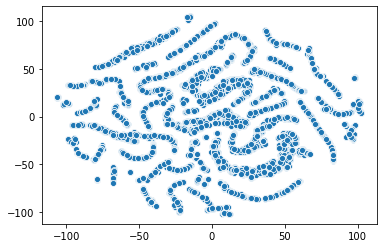

In [23]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full')

In [22]:
x.shape

(493033, 21)

 # 3. Agrupación

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import adjusted_rand_score

In [23]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)
affinity_clustering = SpectralClustering(n_clusters=2)
#AffinityPropagation(0.5)
# Fit the algorithms to the features
kmeans.fit(x[:3033,:])
dbscan.fit(x[:3033,:])
affinity_clustering.fit(x[:3033,:])
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(x[:3033,:], kmeans.labels_[:3033]).round(2)
dbscan_silhouette = silhouette_score(x[:3033,:], dbscan.labels_[:3033]).round(2)
affinity_silhouette = silhouette_score(x[:3033,:], affinity_clustering.labels_[:3033]).round(2)

In [ ]:
 # 4. Coeficiente de silueta

In [26]:
kmeans_silhouette

0.36

In [27]:
dbscan_silhouette

0.71

In [28]:
affinity_silhouette

0.81

### Despues de calcular el coeficiente de silueta para los tres algoritmos de agrupacion, podemos concluir que la mejor agrupación esta dada por el algoritmo de agrupación espectral, esto una vez que el coeficiente se encuentra más próximo al 1.

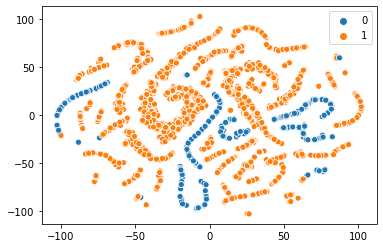

In [27]:
sns.scatterplot(X_embedded[:3033,0], X_embedded[:3033,1], hue = kmeans.labels_[:3033], legend='full')

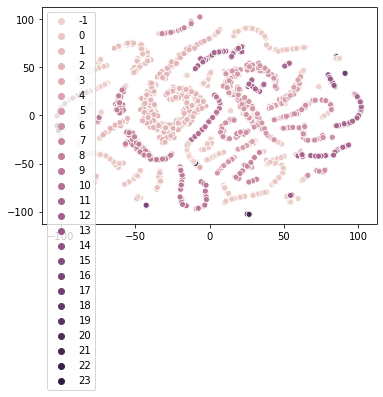

In [28]:
sns.scatterplot(X_embedded[:3033,0], X_embedded[:3033,1], hue = dbscan.labels_[:3033], legend='full')

In [ ]:
sns.scatterplot(X_embedded[:3033,0], X_embedded[:3033,1], hue = affinity_clustering.labels_[:3033], legend='full')